In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing



In [2]:
housing = fetch_california_housing()
X, y = pd.DataFrame(housing.data, columns=housing.feature_names), pd.Series(housing.target, name="MedHouseVal")

print("California Housing dataset: "); print(f"Dataset shape: {X.shape}")
print("\nFirst 5 rows: "); print(X.head())
print("\nTarget variable state: "); print(y.describe())

California Housing dataset: 
Dataset shape: (20640, 8)

First 5 rows: 
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target variable state: 
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


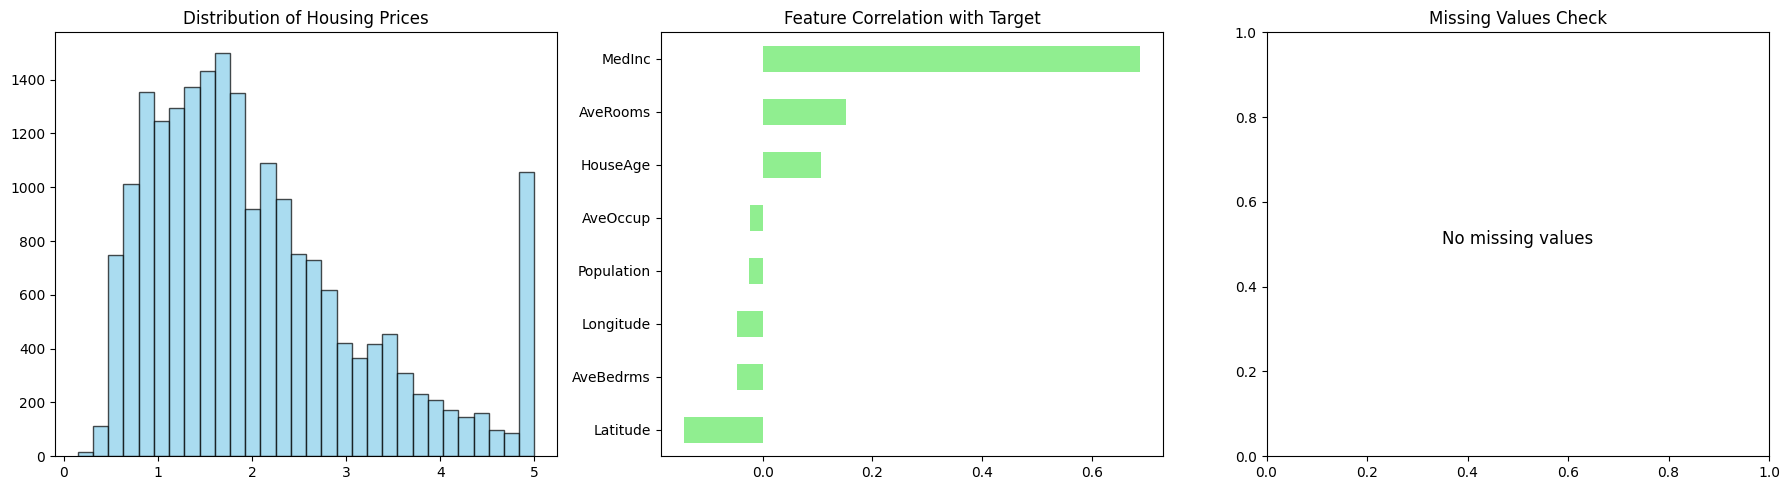

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.hist(y, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
ax1.set_title('Distribution of Housing Prices')

X.corrwith(y).sort_values().plot(kind='barh', ax=ax2, color='lightgreen')
ax2.set_title('Feature Correlation with Target')

missing = X.isnull().sum()
if missing.sum() > 0:
    missing.plot(kind='barh', ax=ax3, color='salmon')
else:
    ax3.text(0.5, 0.5, "No missing values", ha='center', fontsize=12)
ax3.set_title('Missing Values Check')

plt.tight_layout(); plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
model = LinearRegression()

model.fit(scaler.fit_transform(X_train), y_train)
y_pred = model.predict(scaler.transform(X_test))

# 4. Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n" + "="*50 + "\nModel Performance Metrics:\n" + "="*50)
print(f"R2 Score: {r2:.4f}")
print(f"RMSE in Dollars: ${rmse*100000:.2f}")


Model Performance Metrics:
R2 Score: 0.5758
RMSE in Dollars: $74558.14
